# Exploratory data analysis ###

 ### Context

Для анализа данного датасета рассмотрю классические вопросы:
1. Сколько пассажиров выжило на Титанике?
2. Влиял ли пол на выживание?
3. Какой класс имел наибольшее число выживших?

# Data quality assessment

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [42]:
titanik_data = pd.read_csv('train.csv', sep = ',')
titanik_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


PassengerId — уникальный ID пассажира

Survived — выжил пассажир или нет (0 - нет, 1 - да)

Pclass — класс каюты (1 - 1-ый класс, 2 - 2-ой класс; 3 - 3-ий класс)

Name — имя пассажира

Sex — пол пассажира (male - мужской, female - женский)

Age — возраст пассажира

SibSp — количество братьев и сестер / супругов за границей

Parch — количество родителей / детей на борту

Ticket — номер билета

Fare — стоимость билета (британские фунты)

Cabin — номер каюты

Embarked — порт, в котором сел пассажир

# Data exploration

# Info

In [4]:
titanik_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


## Observation of target variable

In [11]:
titanik_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


* Визуализация распределения из 'Survived' 

C:\Users\katri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Density'>

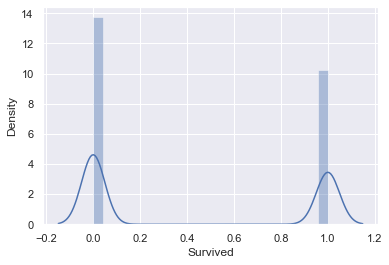

In [57]:
sns.distplot(titanik_data['Survived'], color ='b')

* Установка 'PassengerId' как индекс

In [33]:
titanik_data = titanik_data.set_index('PassengerId')

# Numerical and Categorical features¶
* ### List of Numerical and Categorical features

* Определение числовых и категориальных данных

In [20]:
numerical_feats = titanik_data.dtypes[titanik_data.dtypes != 'object'].index
print ('Quantity of Numerical features: ', len(numerical_feats))
print ()
print (titanik_data[numerical_feats].columns)
print ()
categorical_feats = titanik_data.dtypes[titanik_data.dtypes == 'object'].index
print ('Quantity of Categorical features: ', len(categorical_feats))
print ()
print (titanik_data[categorical_feats].columns)

Quantity of Numerical features:  6

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

Quantity of Categorical features:  5

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


* ### Missing values

* Определение пропущенных значений

In [21]:
nan_columns = [i for i in titanik_data.columns if titanik_data[i].isnull().any()]
print(titanik_data.isnull().sum())
print()
print("There are " + str(len(nan_columns)) +" columns with NAN values for 100000 rows.")
nan_columns

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

There are 5 columns with NAN values for 100000 rows.


['Age', 'Ticket', 'Fare', 'Cabin', 'Embarked']

* Теперь можно посмотреть на корреляцию всех перемнных со всеми и уже по такой матрице можно делать первые выводы о том, 
какие перемнные могут быть важны в анализе.

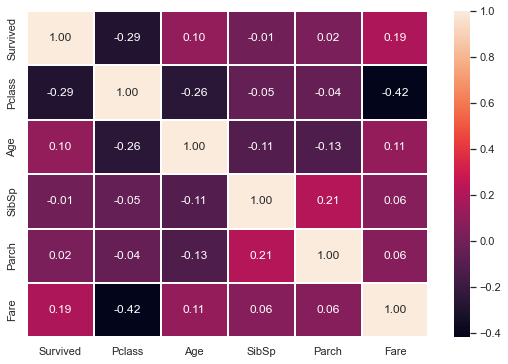

In [34]:
corr = titanik_data.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

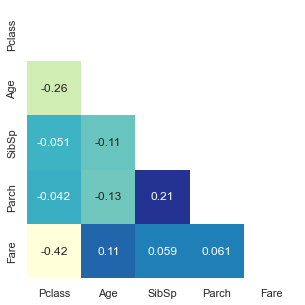

In [38]:
corr = titanik_data.drop(columns = ['Survived']).corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f,ax = plt.subplots(figsize=(10, 5))
    ax = sns.heatmap(
            corr, mask = mask, vmax = 0.3, annot =True, square = True, cmap = 'YlGnBu', cbar = False
    )

* Видим слабую негативную корреляцию Parch и Pclass

* Видим слабую позитивную корреляцию Fare и SibSp

* Cмотреть на взаимодействие всех переменных со всеми из-за большого количества факторных переменных  не целесообразно. Уберу некоторые переменные, которые имеют слабую корреляцию.

In [43]:
titanik_subset = titanik_data.copy()
titanik_subset.drop(['PassengerId','Name','Ticket', 'Cabin'],axis=1,inplace=True)

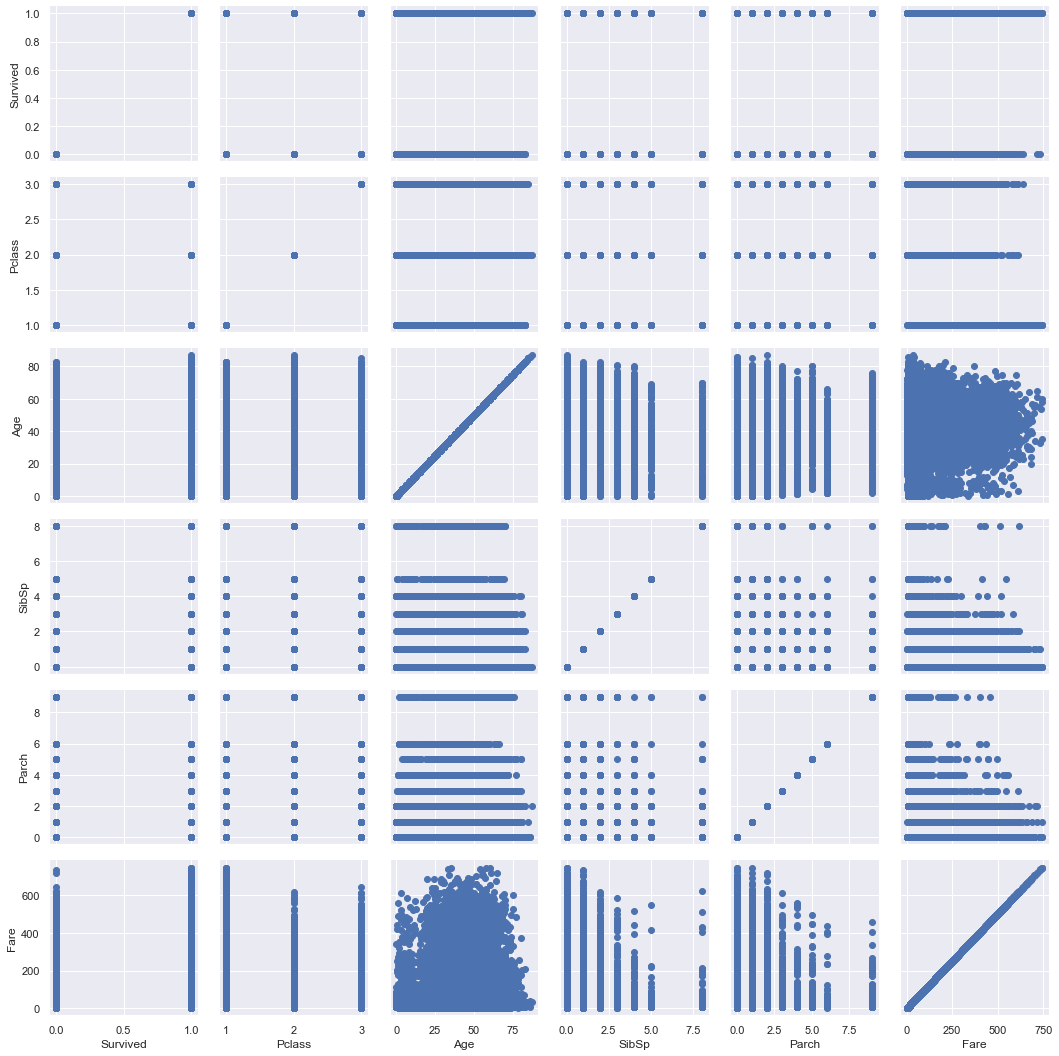

In [44]:
pair_grid_plot_1 = sns.PairGrid(titanik_subset)
pair_grid_plot_1.map(plt.scatter)

C:\Users\katri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

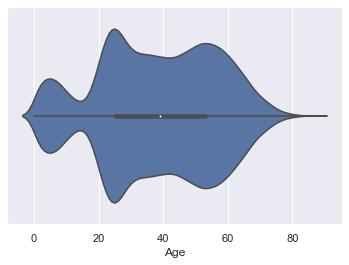

In [45]:
sns.violinplot(titanik_data['Age'])

*  Широкая и тонкая черная полоса внутри "виолончели" соответствует "ящику" и усам" boxplot-а, а белая точка внутри - это медиана.

### Сколько всего пассажиров выжило на Титанике:

0.42774


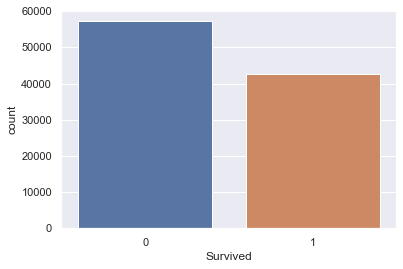

In [47]:
sns.countplot(x = 'Survived', data = titanik_data)

print(titanik_data.Survived.sum()/titanik_data.Survived.count())

* Есть ли влияние пола на выживаемость людей.

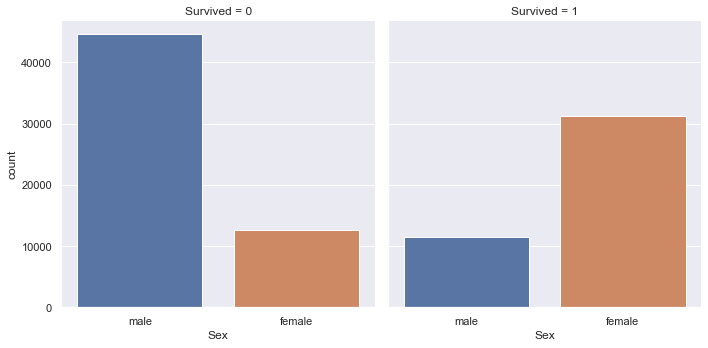

In [48]:
sns.catplot(x = 'Sex', col = 'Survived', kind = 'count', data = titanik_data)

* Другое представление распределения выживших

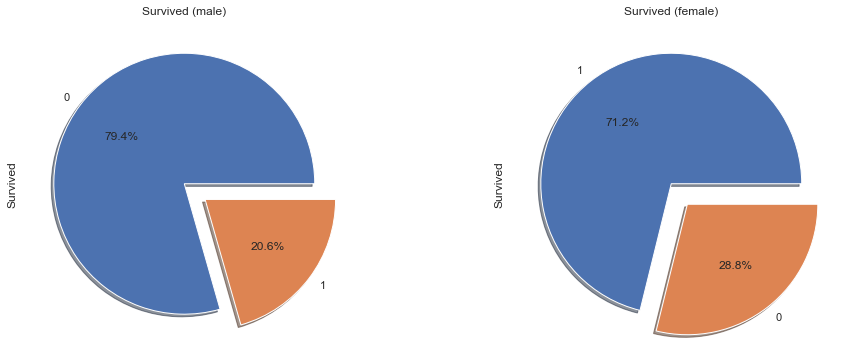

In [56]:
f,ax=plt.subplots(1,2,figsize=(16,6))
titanik_data['Survived'][titanik_data['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
titanik_data['Survived'][titanik_data['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

* Сводная таблица по Survived и Pclass

In [52]:
pd.crosstab(titanik_data.Pclass, titanik_data.Survived, margins=True).style.background_gradient(cmap='YlGnBu')

Survived,0,1,All
Pclass,,,
1,12739,17576,30315
2,13622,15057,28679
3,30865,10141,41006
All,57226,42774,100000


* Сколько в % выжило людей в зависимости от класса кают

In [54]:
print("Pclass=1 : ", titanik_data.Survived[titanik_data.Pclass == 1].sum()/titanik_data[titanik_data.Pclass == 1].Survived.count())
print("Pclass=2 : ", titanik_data.Survived[titanik_data.Pclass == 2].sum()/titanik_data[titanik_data.Pclass == 2].Survived.count())
print("Pclass=3 : ", titanik_data.Survived[titanik_data.Pclass == 3].sum()/titanik_data[titanik_data.Pclass == 3].Survived.count())

Pclass=1 :  0.5797789873000165
Pclass=2 :  0.5250183060776178
Pclass=3 :  0.24730527239916109


* Распределение того, как менялась доля выживших в зависимости от класса кают.

C:\Users\katri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


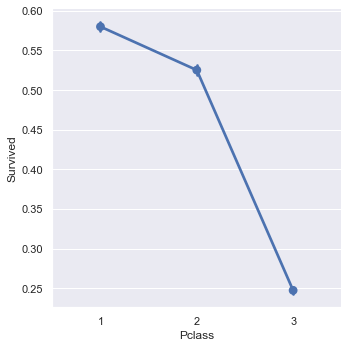

In [58]:
sns.catplot('Pclass','Survived', kind = 'point', data = titanik_data)

* Учтен пол пассажиров.

C:\Users\katri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


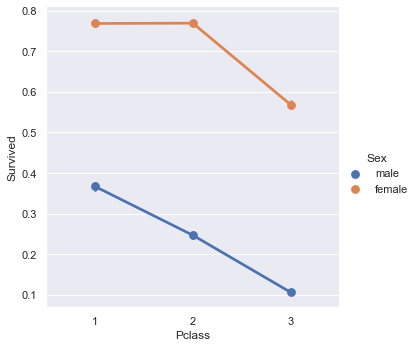

In [59]:
sns.catplot('Pclass','Survived',hue = 'Sex', kind = 'point', data = titanik_data)

# Summary

### Разведочный анализ данных данного датасета  показал, что класс и пол являются более сильными переменными. В настоящем Титанике было 2208 человек и класс не являлся сильной переменной.